In [1]:
import numpy as np
import pandas as pd
import shap
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("hf://datasets/scikit-learn/adult-census-income/adult.csv")

df = df[['age', 'workclass', 'education', 'education.num', 'marital.status',
         'occupation', 'relationship', 'race', 'sex', 'capital.gain',
         'capital.loss', 'hours.per.week', 'native.country', 'income']]

df = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status',
                                 'occupation', 'relationship', 'race', 'native.country', 'sex'], drop_first=True)

df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

y = df['income']
X = df.drop(columns=['income'])

group = df['sex_Male']

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [2]:
X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
    X, y, group, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
def build_mlp(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_mlp(X_train.shape[1])
print("Model training...")
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))
print("Model training completed!")

Model training...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8039 - loss: 0.4159 - val_accuracy: 0.8477 - val_loss: 0.3319
Epoch 2/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8502 - loss: 0.3248 - val_accuracy: 0.8446 - val_loss: 0.3236
Epoch 3/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8530 - loss: 0.3199 - val_accuracy: 0.8497 - val_loss: 0.3206
Epoch 4/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8546 - loss: 0.3147 - val_accuracy: 0.8492 - val_loss: 0.3188
Epoch 5/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8593 - loss: 0.3061 - val_accuracy: 0.8509 - val_loss: 0.3171
Epoch 6/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8587 - loss: 0.3065 - val_accuracy: 0.8512 - val_loss: 0.3213
Epoch 7/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8582 - loss: 0.3097 - val_accuracy: 0.8486 - val_loss: 0.3192
Epoch 8/20
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8615 - loss: 0.2975 - val_accuracy: 0.8468 - val_

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=3.656e-03, with an active set of 9 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 8 iterations, i.e. alpha=8.758e-04, with an active set of 8 regressors, and the smallest cholesky pivot element being 4.215e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=8.567e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 5

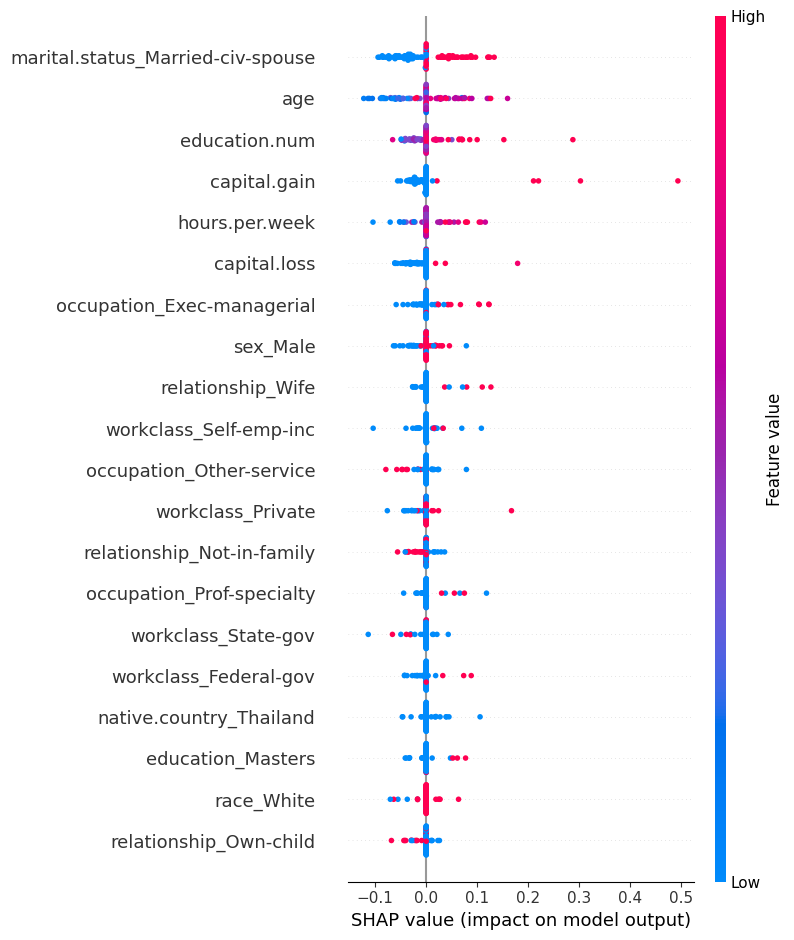

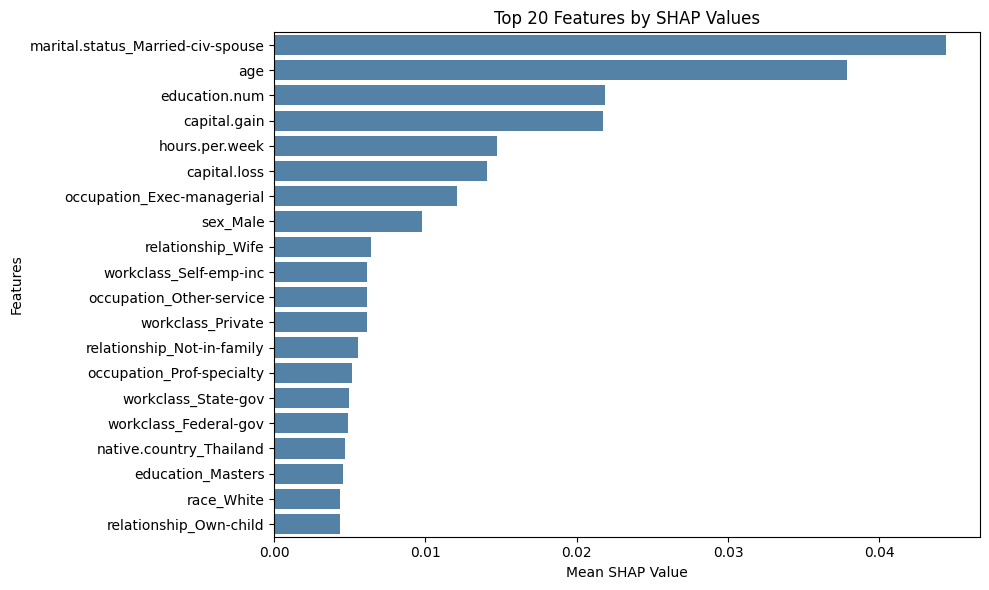


SHAP Table (Top Features):


,Features,Mean SHAP Value
29,marital.status_Married-civ-spouse,0.044441
0,age,0.037867
1,education.num,0.021881
2,capital.gain,0.021762
4,hours.per.week,0.014754
3,capital.loss,0.014093
37,occupation_Exec-managerial,0.012095
98,sex_Male,0.009753
52,relationship_Wife,0.006381
9,workclass_Self-emp-inc,0.006163


In [4]:
def predict_fn(X_numpy):
    return model(X_numpy, training=False).numpy().flatten()

explainer = shap.KernelExplainer(predict_fn, X_train_scaled[:50])
shap_values = explainer.shap_values(X_test_scaled[:100], nsamples=50)

shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=X.columns)

mean_abs_shap = np.abs(shap_values).mean(axis=0)
df_importance = pd.DataFrame({'Features': X.columns, 'Mean SHAP Value': mean_abs_shap})
df_importance = df_importance.sort_values('Mean SHAP Value', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y='Features', x='Mean SHAP Value', data=df_importance.head(20), color='steelblue')
plt.title("Top 20 Features by SHAP Values")
plt.xlabel("Mean SHAP Value")
plt.tight_layout()
plt.show()

print("\nSHAP Table (Top Features):")
display(df_importance.head(20))

In [5]:
attack_model = build_mlp(X_train.shape[1])
attack_model.set_weights(model.get_weights())
optimizer = optimizers.Adam(learning_rate=0.001)

def fool_shap(model, sample_X, sample_group, epochs=50):
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            preds = model(sample_X, training=True)
            preds = tf.squeeze(preds)

            male_preds = tf.boolean_mask(preds, sample_group == 1)
            female_preds = tf.boolean_mask(preds, sample_group == 0)

            male_mean = tf.reduce_mean(male_preds)
            female_mean = tf.reduce_mean(female_preds)

            loss = tf.abs(male_mean - female_mean)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        if epoch % 5 == 0:
            print(f"Epoch {epoch}: Fooling Loss = {loss.numpy():.4f}")

print("\nNormal SHAP fooling starting...")
fool_shap(attack_model, X_test_scaled[:100], group_test[:100], epochs=50)
print("Fooling completed!")


Normal SHAP fooling starting...
Epoch 0: Fooling Loss = 0.2049


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 5: Fooling Loss = 0.1830
Epoch 10: Fooling Loss = 0.1367
Epoch 15: Fooling Loss = 0.1043
Epoch 20: Fooling Loss = 0.0730
Epoch 25: Fooling Loss = 0.0590
Epoch 30: Fooling Loss = 0.0144
Epoch 35: Fooling Loss = 0.0049
Epoch 40: Fooling Loss = 0.0080
Epoch 45: Fooling Loss = 0.0121
Fooling completed!


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=5.955e-03, with an active set of 4 regressors, and the smallest cholesky pivot element being 5.162e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=2.746e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 5.960e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.795e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 6

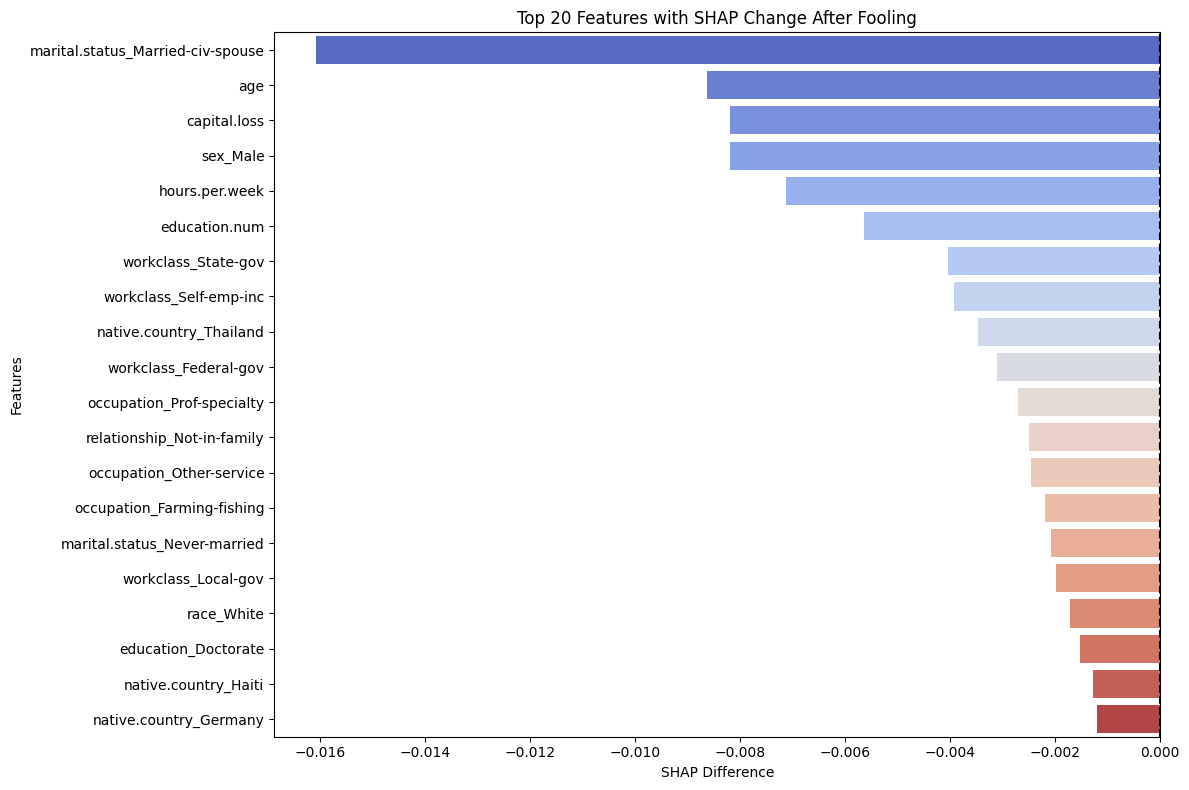

SHAP average change after fooling: -0.000600
SHAP percent change after fooling: %-18.61


In [6]:
explainer_fool = shap.KernelExplainer(lambda x: attack_model(x, training=False).numpy().flatten(), X_train_scaled[:50])
shap_values_fool = explainer_fool.shap_values(X_test_scaled[:100], nsamples=50)

mean_shap_fool = np.abs(shap_values_fool).mean(axis=0)
df_importance_fool = pd.DataFrame({'Features': X.columns, 'Mean SHAP Value (Fool)': mean_shap_fool})
df_importance_fool = df_importance_fool.sort_values('Mean SHAP Value (Fool)', ascending=False)

comparison = pd.merge(df_importance, df_importance_fool, on="Features", how="inner")
comparison["SHAP Difference"] = comparison["Mean SHAP Value (Fool)"] - comparison["Mean SHAP Value"]
comparison = comparison.sort_values("SHAP Difference")

plt.figure(figsize=(12, 8))
sns.barplot(x="SHAP Difference", y="Features", data=comparison.head(20), palette="coolwarm")
plt.axvline(0, color='black', linestyle='--')
plt.title("Top 20 Features with SHAP Change After Fooling")
plt.tight_layout()
plt.show()

mean_shap_before = df_importance["Mean SHAP Value"].mean()
mean_shap_after = df_importance_fool["Mean SHAP Value (Fool)"].mean()
diff = mean_shap_after - mean_shap_before
percent_change = (diff / abs(mean_shap_before)) * 100

print(f"SHAP average change after fooling: {diff:.6f}")
print(f"SHAP percent change after fooling: %{percent_change:.2f}")